# Simulação de Monte Carlo em python

A simulação de Monte Carlo é uma das ferramentas mais utilizadas por analistas e especialistas financeiros em todo o mercado financeiro.

A teoria pode ser usada para se calcular riscos em investimentos, isso porque permite calcular perdas em casos de aumento de inflação, juros e taxações, desvalorização de ativos e mudanças nas políticas monetárias, por exemplo. Todas as simulações feitas vão poder quais os cenários ideais e quais são os riscos de um investimento. Por isso, a teoria é tão utilizada para evitar surpresas. A simulação não garante acertos totais, mas permite que analistas possam prever possíveis cenários e buscarem estratégias para cada probabilidade.

In [6]:
#IMPORTANDO BIBLIOTECAS
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

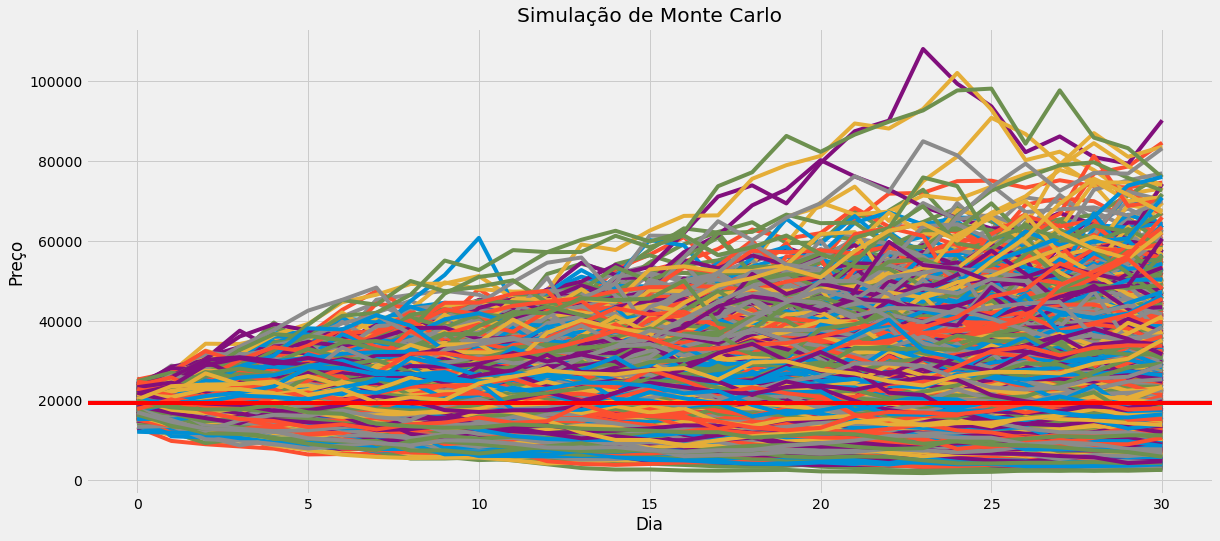

In [11]:
plt.style.use('fivethirtyeight')

precos = web.DataReader('BTCUSD=X', data_source='yahoo', start='2007-01-01', end='2020-12-15')['Close']
returns = precos.pct_change()

ultimo_preco = precos[-1]

#Numero de simulações
num_simulacoes = 10000
num_dias = 30

simulacao_df = pd.DataFrame()

for x in range(num_simulacoes):
    count = 0
    daily_vol = returns.std()
    
    preco_series = []
    
    preco = ultimo_preco * (1 + np.random.normal(0, daily_vol))
    preco_series.append(preco)
    
    for y in range(num_dias):
        if count == 251:
            break
        preco = preco_series[count] * (1 + np.random.normal(0, daily_vol))
        preco_series.append(preco)
        count += 1
    
    simulacao_df[x] = preco_series
    
fig = plt.figure()
plt.figure(figsize=(18,8))
plt.title('Simulação de Monte Carlo')
plt.plot(simulacao_df)
plt.axhline(y = ultimo_preco, color = 'r', linestyle = '-')
plt.xlabel('Dia')
plt.ylabel('Preço')
plt.show()